In [1]:
#https://ithelp.ithome.com.tw/articles/10195071
#https://github.com/GeneralMills/pytrends
import pandas as pd
import numpy as np
import datetime as dt
import psycopg2
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import time
pd.set_option('display.max_columns', 100)
pd.options.display.max_rows = 999

#set chinese font
from matplotlib.font_manager import FontProperties
sn.set(font=['sans-serif'])
sn.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

import sys
sys.path.append("../../")
from _module_.dbtool import io

import warnings
warnings.filterwarnings("ignore")

from pytrends.request import TrendReq
pytrend = TrendReq(hl='zh-TW', tz=-480)

In [2]:
import seaborn as sn
cycle = sn.color_palette("Set2")
cycle2 = sn.color_palette("GnBu_d")
sns_default = sn.color_palette("tab10")

In [3]:
def gtrend(key_array, period='today 1-m', norm=True, plot=True):
    #period: ['now 1-H','now 4-H','now 1-d','now 7-d','today 1-m', 'today 3-m','today 12-m',
    #'today 5-y','all', 'yyyy-mm-dd yyyy-mm-dd']
    pytrend = TrendReq(hl='zh-TW', tz=-480)
    cnt = 0
    for key in key_array:
        pytrend.build_payload(kw_list=[key], cat=0, timeframe=period, geo='TW', gprop='')
        if cnt==0:
            ans = pytrend.interest_over_time().reset_index()
        else:
            tmp = pytrend.interest_over_time().reset_index()
            ans = ans.merge(tmp, on='date', how='left')
        cnt += 1
        if cnt%3==0:
            time.sleep(1)
    
    ans[key_array] = ans[key_array].astype('int')
    ans['date'] = pd.to_datetime(ans['date'])
    ans = ans[['date']+key_array]
    
    if norm:
        scale = StandardScaler()
        ans[key_array] = pd.DataFrame(scale.fit_transform(ans[key_array]), columns=key_array)
    
    if plot:
        fig,ax = plt.subplots(figsize=(10,6))
        for key in key_array:
            sn.lineplot(y = key, x = "date", data = ans, linewidth = 3, label=key)
        plt.xticks(rotation=45), plt.ylabel('Trend'), plt.xlabel('Time')
    
    if norm:
        return(ans,scale)
    else:
        return(ans)
    
def gplot(key_array, data):
    fig,ax = plt.subplots(figsize=(10,6))
    for key in key_array:
        sn.lineplot(y = key, x = "date", data = data, linewidth = 3, label=key)
    plt.xticks(rotation=45), plt.ylabel('Trend'), plt.xlabel('Time')
    
def corr_plot(data, corr='spearman', use_mask=True):
    corr_matrix = data.corr('spearman') #排序相關係數
    mask = np.zeros_like(corr_matrix)
    mask[np.triu_indices_from(mask)] = True
    with sn.axes_style('white'):
        fig, ax = plt.subplots(figsize=(12,10))
        if use_mask:
            corr_map = sn.heatmap(corr_matrix,mask=mask,annot=True,ax=ax, cmap="YlGn")
        else:
            corr_map = sn.heatmap(corr_matrix,annot=True,ax=ax,cmap="YlGn")
        plt.xticks(rotation=50), plt.yticks(rotation=0)

In [4]:
relevant = ['iPhone']
result = gtrend(relevant,period='all', norm=False, plot=False)
result.head()

,date,iPhone
0,2004-01-01,0
1,2004-02-01,0
2,2004-03-01,0
3,2004-04-01,0
4,2004-05-01,0


In [5]:
# iPhone當實驗
df_iphone = io.read_table('''felixlin."Proj024_samsung_lg_predict_iphone"''', 'std', False)

In [6]:
# 神腦總訂單 - 景氣/經營因子
df_senao_year = io.read_table('''felixlin."Proj024_samsung_lg_predict_phone_summary_year"''', 'std', False)
df_senao_month = io.read_table('''felixlin."Proj024_samsung_lg_predict_phone_summary_month"''', 'std', False)

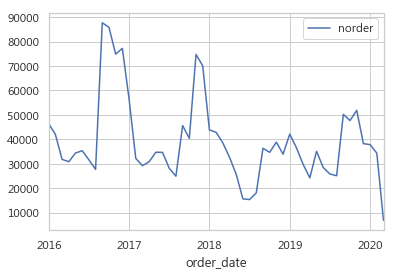

In [7]:
df_iphone[['order_date', 'norder']].set_index('order_date').plot()

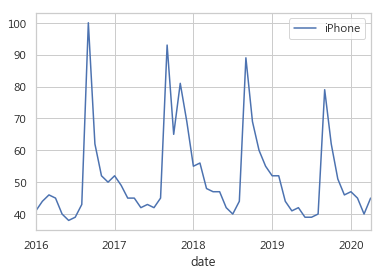

In [8]:
result[result.date>='2016-01-01'].set_index('date').plot()

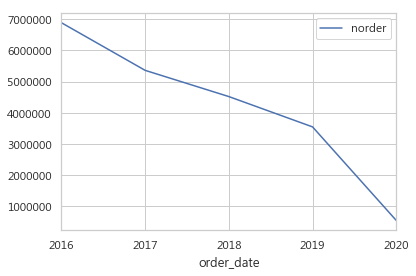

In [9]:
df_senao_year[['order_date', 'norder']].set_index('order_date').plot()

In [10]:
relevant2 = ['iPhone XR', 'iPhone 11']
result2 = gtrend(relevant2,period='all', norm=False, plot=False)
result2.head()

,date,iPhone XR,iPhone 11
0,2004-01-01,0,0
1,2004-02-01,0,0
2,2004-03-01,0,0
3,2004-04-01,0,0
4,2004-05-01,0,0


In [11]:
result2

,date,iPhone XR,iPhone 11
0,2004-01-01,0,0
1,2004-02-01,0,0
2,2004-03-01,0,0
3,2004-04-01,0,0
4,2004-05-01,0,0
5,2004-06-01,0,0
6,2004-07-01,0,0
7,2004-08-01,0,0
8,2004-09-01,0,0
9,2004-10-01,0,0


In [12]:
df_samsung = io.read_table('''
    -- 各機型各月度累計銷量
    with tmp as
    (
        select 
            model,
            date_trunc('month', order_date) order_month,
            count(distinct sl_key_new) norder,
            count(*) nphone,
            count(distinct sl_key_new) filter (where member_id is not null) norder_mmb,
            count(distinct member_id) filter (where member_id is not null) nmmb_mmb
        from felixlin."Proj024_samsung_lg_predict_samsung_user" 
        group by 1, 2
        order by norder desc
    )
    select 
        tmp.*, release_date
    from tmp
    left join felixlin."Proj024_samsung_lg_predict_model" using (model)
    order by model, order_month, norder desc
''', verbose = False)

In [13]:
df_samsung.head(2)

,model,order_month,norder,nphone,norder_mmb,nmmb_mmb,release_date
0,Note10,2019-08-01,1037,1038,415,411,2019-08-01
1,Note10,2019-09-01,2084,2084,789,776,2019-08-01


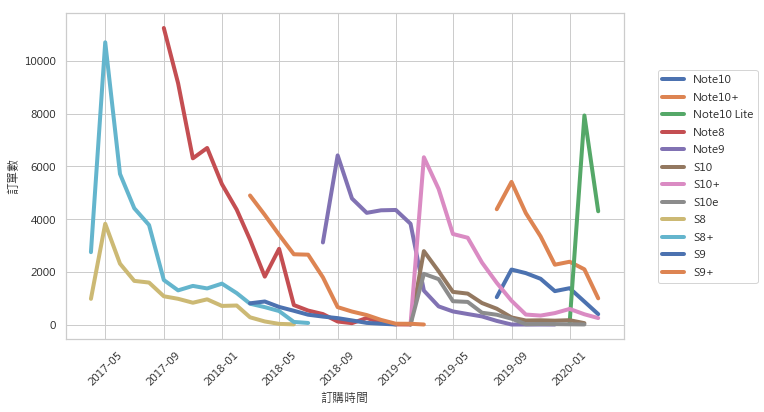

In [14]:
fig,ax = plt.subplots(figsize=(10,6))
for br in df_samsung.model.unique():
    sn.lineplot(y = 'nphone', x = 'order_month', data = df_samsung[df_samsung.model==br], linewidth = 4, label=br)
    plt.xticks(rotation=45), plt.ylabel('訂單數'), plt.xlabel('訂購時間')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [15]:
tmp = df_samsung.groupby('order_month').agg({'nphone':np.sum}).reset_index()

In [16]:
tmp.head(2)

,order_month,nphone
0,2017-04-01,3716
1,2017-05-01,14519


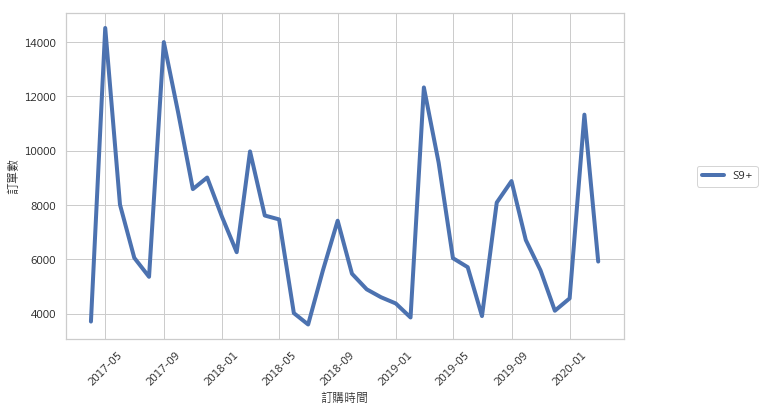

In [17]:
fig,ax = plt.subplots(figsize=(10,6))
sn.lineplot(y = 'nphone', x = 'order_month', data = tmp, linewidth = 4, label=br)
plt.xticks(rotation=45), plt.ylabel('訂單數'), plt.xlabel('訂購時間')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [18]:
# 把S10系列合併
df_samsung_tmp = df_samsung[df_samsung.model.isin(['S10', 'S10+', 'S10e'])].groupby('order_month').agg({'nphone':np.sum}).reset_index()

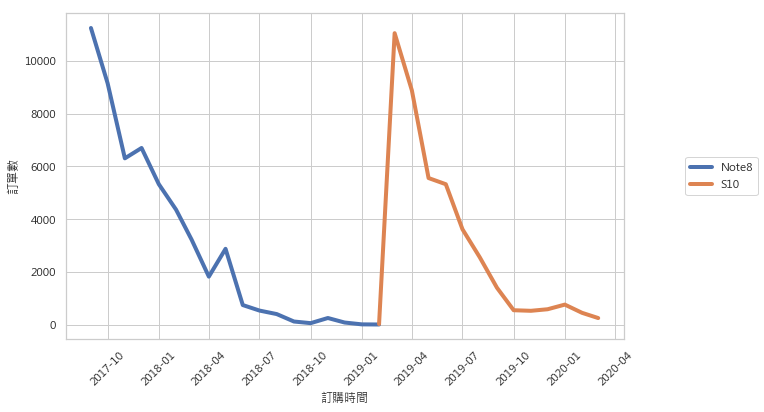

In [19]:
fig,ax = plt.subplots(figsize=(10,6))
sn.lineplot(y = 'nphone', x = 'order_month', data = df_samsung[df_samsung.model=='Note8'], linewidth = 4, label='Note8')
sn.lineplot(y = 'nphone', x = 'order_month', data = df_samsung_tmp, linewidth = 4, label='S10')
plt.xticks(rotation=45), plt.ylabel('訂單數'), plt.xlabel('訂購時間')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

#### 所有系列合併

In [20]:
df_samsung.model.unique()

array(['Note10', 'Note10+', 'Note10 Lite', 'Note8', 'Note9', 'S10',
       'S10+', 'S10e', 'S8', 'S8+', 'S9', 'S9+'], dtype=object)

In [21]:
combine_list = np.array([['Note10', 'Note10+'], ['Note10 Lite'], ['Note8'], ['Note9'], 
                         ['S10','S10+', 'S10e'], ['S8', 'S8+'], ['S9', 'S9+']])

In [22]:
df_samsung.head(2)

,model,order_month,norder,nphone,norder_mmb,nmmb_mmb,release_date
0,Note10,2019-08-01,1037,1038,415,411,2019-08-01
1,Note10,2019-09-01,2084,2084,789,776,2019-08-01


In [23]:
df_samsung_combine = pd.DataFrame()

for ii in combine_list:
    tmp = df_samsung.loc[df_samsung.model.isin(ii)].copy()
    tmp.model = ii[0]
    tmp = tmp.groupby('order_month').agg({'model':max, 'nphone':sum, 'norder_mmb':sum, 
                                          'nmmb_mmb':sum, 'release_date':min}).reset_index()
    df_samsung_combine = df_samsung_combine.append(tmp)

In [24]:
df_samsung_combine.head(2)

,order_month,model,nphone,norder_mmb,nmmb_mmb,release_date
0,2019-08-01,Note10,5409,2360,2283,2019-08-01
1,2019-09-01,Note10,7491,2999,2906,2019-08-01


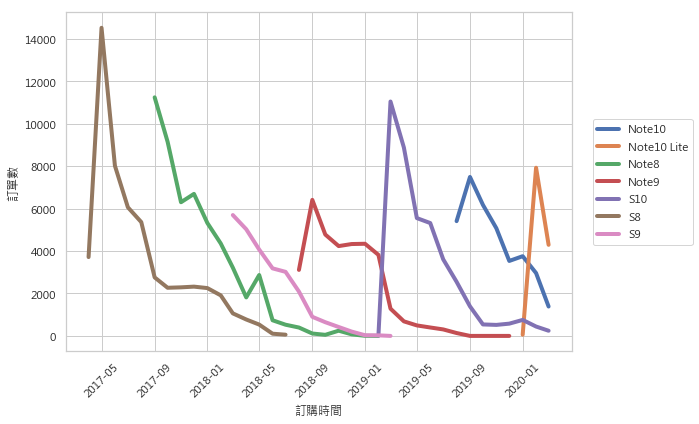

In [25]:
fig,ax = plt.subplots(figsize=(10,6))
for br in df_samsung_combine.model.unique():
    sn.lineplot(y = 'nphone', x = 'order_month', data = df_samsung_combine[df_samsung_combine.model==br], linewidth = 4, label=br)
    plt.xticks(rotation=45), plt.ylabel('訂單數'), plt.xlabel('訂購時間')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.tight_layout()

In [26]:
df_samsung_all = df_samsung_combine.groupby('order_month').agg({'nphone':sum}).reset_index()

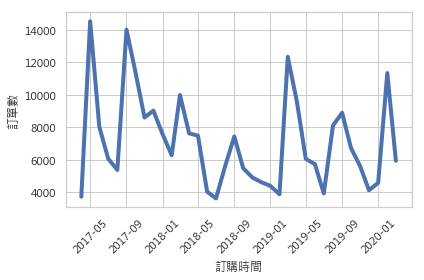

In [27]:
sn.lineplot(y = 'nphone', x = 'order_month', data = df_samsung_all, linewidth = 4)
plt.xticks(rotation=45), plt.ylabel('訂單數'), plt.xlabel('訂購時間')
plt.tight_layout()

#### 每日銷量

In [28]:
df_samsung_day = io.read_table('''
    -- 各機型各日累計銷量
    with tmp as
    (
        select 
            model,
            date_trunc('day', order_date) order_date,
            count(distinct sl_key_new) norder,
            count(*) nphone,
            count(distinct sl_key_new) filter (where member_id is not null) norder_mmb,
            count(distinct member_id) filter (where member_id is not null) nmmb_mmb
        from felixlin."Proj024_samsung_lg_predict_samsung_user" 
        group by 1, 2
        order by norder desc
    )
    select 
        tmp.*, release_date
    from tmp
    left join felixlin."Proj024_samsung_lg_predict_model" using (model)
    order by model, order_date, norder desc
''', verbose = False)

In [29]:
df_samsung_day.head(2)

,model,order_date,norder,nphone,norder_mmb,nmmb_mmb,release_date
0,Note10,2019-08-15,4,4,4,4,2019-08-01
1,Note10,2019-08-16,2,2,2,2,2019-08-01


In [30]:
df_samsung_day_combine = pd.DataFrame()

for ii in combine_list:
    tmp = df_samsung_day.loc[df_samsung_day.model.isin(ii)].copy()
    tmp.model = ii[0]
    tmp = tmp.groupby('order_date').agg({'model':max, 'nphone':sum, 'norder_mmb':sum, 
                                          'nmmb_mmb':sum, 'release_date':min}).reset_index()
    df_samsung_day_combine = df_samsung_day_combine.append(tmp)

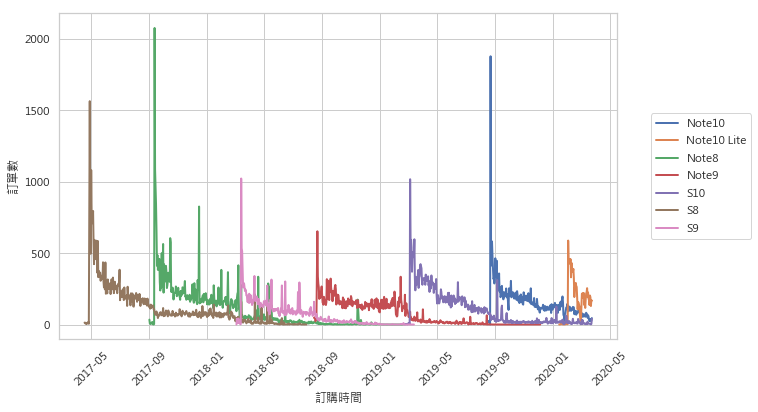

In [31]:
fig,ax = plt.subplots(figsize=(10,6))
for br in df_samsung_day_combine.model.unique():
    sn.lineplot(y = 'nphone', x = 'order_date', data = df_samsung_day_combine[df_samsung_day_combine.model==br], linewidth = 2, label=br)
    plt.xticks(rotation=45), plt.ylabel('訂單數'), plt.xlabel('訂購時間')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

#### Samsung 機型銷量

In [32]:
df_samsung_sum = io.read_table('''
    select 
        model, capacity, 
        count(distinct member_id) nmmb,
        sum(sl_amt) amt, 
        count(distinct sl_key_new) norder,
        count(*) qty, 
        mode() within group (order by sl_price) price,
        min(release_date) release_date
    from felixlin."Proj024_samsung_lg_predict_samsung_user" 
    group by model, capacity;
''', verbose = False)

In [33]:
df_samsung_sum[['nmmb', 'price']].corr('spearman')

,nmmb,price
nmmb,1.000000,-0.137847
price,-0.137847,1.000000


In [34]:
df_samsung_sum = df_samsung_sum.sort_values(['release_date', 'model'], ascending = True)

In [35]:
# 是否為S系列
df_samsung_sum['S'] = df_samsung_sum.model.apply(lambda x: 1 if 'S' in x else 0, 0)
# 是否為plus(大尺寸)
df_samsung_sum['plus'] = df_samsung_sum.model.apply(lambda x: 1 if '+' in x else 0, 0)
# 離S8發表的時間
df_samsung_sum['time'] = (df_samsung_sum['release_date'] - df_samsung_sum['release_date'].min()).dt.days
# 容量
df_samsung_sum['msize'] = df_samsung_sum.capacity.map({'64G':0, '128G':1, '256G':2, '512G':3})

In [36]:
# 該機型佔比
df_samsung_sum['stdmodel'] = df_samsung_sum.model.map({'S8':'S8', 'S8+':'S8', 'Note8':'Note8', 'S9':'S9', 'S9+':'S9', 
                                                       'S9+':'S9', 'S9+':'S9', 'Note9':'Note9', 'Note9':'Note9','S10':'S10', 
                                                       'S10+':'S10', 'S10+':'S10', 'S10e':'S10', 'Note10':'Note10', 
                                                       'Note10+':'Note10', 'Note10+':'Note10','Note10 Lite':'Note10'})

In [37]:
# 同機型排序
df_samsung_sum['rank'] = 1
df_samsung_sum['rank'] = df_samsung_sum.groupby('stdmodel').agg({'rank':np.cumsum})
df_samsung_sum['rank'] = df_samsung_sum['rank'].apply(lambda x: 1 if x == 2 else 0)

In [38]:
#df_samsung_sum_train = pd.concat([df_samsung_sum[['qty', 'model', 'price', 'S', 'plus', 'time']], pd.get_dummies(df_samsung_sum['capacity'])], axis = 1)
df_samsung_sum_train = df_samsung_sum[['qty', 'model', 'price', 'S', 'plus', 'msize', 'time', 'rank']].set_index('model')

In [39]:
df_samsung_sum_train.head(20)

,qty,price,S,plus,msize,time,rank
model,,,,,,,
S8,16019,24900.0,1,0,0,0,0
S8+,38002,27900.0,1,1,0,0,1
Note8,53121,29900.0,0,0,0,123,0
S9,4030,25500.0,1,0,0,304,0
S9+,15879,29900.0,1,1,1,304,1
S9+,4377,31900.0,1,1,2,304,0
S9+,1038,28900.0,1,1,0,304,0
Note9,31500,30900.0,0,0,1,457,0
Note9,2840,38900.0,0,0,3,457,1


In [40]:
df_samsung_sum_train[['price', 'S', 'plus', 'msize', 'time']].corr('kendall')

,price,msize,time
price,1.000000,0.684737,0.313559
msize,0.684737,1.000000,0.536764
time,0.313559,0.536764,1.000000


#### Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [42]:
forest = RandomForestRegressor(n_estimators  = 120, max_features  = 3, max_depth = 4, bootstrap = True) #max_features =3
forest.fit(df_samsung_sum_train[['price', 'S', 'plus', 'msize', 'time', 'rank']].iloc[0:13], df_samsung_sum_train['qty'].iloc[0:13])
#forest.fit(df_samsung_sum_train[['price', 'S', 'plus', 'msize', 'time']], df_samsung_sum_train['qty'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=120, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [43]:
xfit = np.arange(df_samsung_sum_train.shape[0])
yfit = forest.predict(df_samsung_sum_train[['price', 'S', 'plus', 'msize', 'time', 'rank']])
ytrue = df_samsung_sum_train['qty'].values

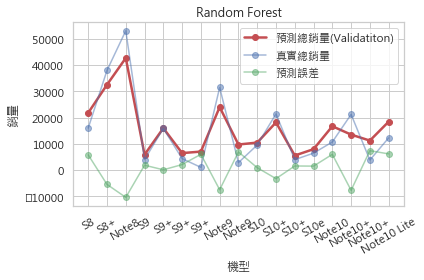

In [44]:
plt.plot(xfit, yfit, '-or', linewidth = 2.5, label='預測總銷量(Validatiton)')
plt.plot(xfit, df_samsung_sum_train['qty'], '-ob', alpha=0.5, label='真實總銷量')
plt.plot(xfit, yfit - ytrue, '-og', alpha=0.5, label='預測誤差')
plt.xticks(xfit, df_samsung_sum_train.index, rotation=30) 
plt.xlabel('機型'), plt.ylabel('銷量'), plt.title('Random Forest'), plt.legend()
plt.tight_layout()

In [45]:
forest.feature_importances_

array([0.16779473, 0.17235752, 0.02813267, 0.14625392, 0.36889895,
       0.1165622 ])

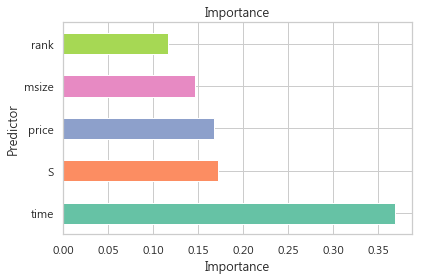

In [46]:
feat_importances = pd.Series(forest.feature_importances_, index = ['price', 'S', 'plus', 'msize', 'time', 'rank'])
feat_importances.nlargest(5).plot(kind='barh', color = cycle)
plt.xlabel('Importance'), plt.ylabel('Predictor'), plt.title('Importance')
plt.tight_layout()

In [47]:
mean_squared_error(df_samsung_sum_train['qty'], yfit, multioutput='raw_values')

array([30811798.94643293])

In [48]:
time_delta = (pd.to_datetime('2020-03-20') - df_samsung_sum['release_date'].min()).days
df_predict_models = pd.DataFrame([['S20', np.nan, 32900, 1, 0, 1, time_delta, 1], 
                                  ['S20+', np.nan, 36900, 1, 1, 1, time_delta, 2], 
                                  ['S20 Ultra', np.nan, 43900, 1, 0, 2, time_delta, 3],
                                  ['S20 Ultra', np.nan, 47900, 1, 0, 3, time_delta, 4]], 
                                 columns = ['model', 'qty', 'price', 'S', 'plus', 'msize', 'time', 'rank'])

In [49]:
df_predict_models

,model,qty,price,S,plus,msize,time,rank
0,S20,NaN,32900,1,0,1,1054,1
1,S20+,NaN,36900,1,1,1,1054,2
2,S20 Ultra,NaN,43900,1,0,2,1054,3
3,S20 Ultra,NaN,47900,1,0,3,1054,4


In [50]:
xfit_test = np.arange(df_samsung_sum_train.shape[0], df_samsung_sum_train.shape[0] + df_predict_models.shape[0])
ytest = forest.predict(df_predict_models[['price', 'S', 'plus', 'msize', 'time', 'rank']])

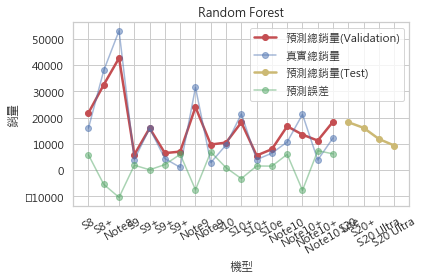

In [51]:
plt.plot(xfit, yfit, '-or', linewidth = 2.5, label='預測總銷量(Validation)')
plt.plot(xfit, df_samsung_sum_train['qty'], '-ob', alpha=0.5, label='真實總銷量')

# predicting new products
plt.plot(xfit_test, ytest, '-oy', linewidth = 2.5, label='預測總銷量(Test)')
plt.plot(xfit, yfit - ytrue, '-og', alpha=0.5, label='預測誤差')
plt.xticks(np.concatenate((xfit, xfit_test)), np.concatenate((df_samsung_sum_train.index, df_predict_models.model)), rotation=30) 

plt.xlabel('機型'), plt.ylabel('銷量'), plt.title('Random Forest'), plt.legend()
plt.tight_layout()

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
mean_squared_error(df_samsung_sum_train['qty'], yfit, multioutput='raw_values')

array([30811798.94643293])

#### XGBoost

In [54]:
from xgboost.sklearn import XGBRegressor

In [55]:
xgb = XGBRegressor(n_estimators=50, max_depth=3)
xgb.fit(df_samsung_sum_train[['price', 'S', 'plus', 'msize', 'time', 'rank']].values, df_samsung_sum_train['qty'].values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [56]:
xfit_xgb = np.arange(df_samsung_sum_train.shape[0])
yfit_xgb = xgb.predict(df_samsung_sum_train[['price', 'S', 'plus', 'msize', 'time', 'rank']].values)
ytrue_xgb = df_samsung_sum_train['qty'].values

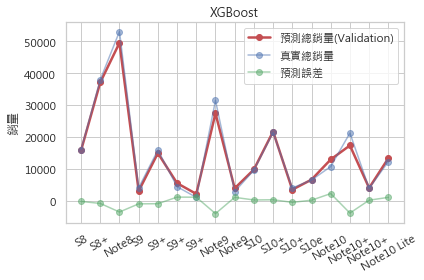

In [57]:
plt.plot(xfit_xgb, yfit_xgb, '-or', linewidth = 2.5, label='預測總銷量(Validation)')
plt.plot(xfit_xgb, df_samsung_sum_train['qty'], '-ob', alpha=0.5, label='真實總銷量')
plt.plot(xfit_xgb, yfit_xgb - ytrue_xgb, '-og', alpha=0.5, label='預測誤差')
plt.xticks(xfit_xgb, df_samsung_sum_train.index, rotation=30) 
plt.ylabel('銷量'), plt.title('XGBoost'), plt.legend()
plt.tight_layout()

In [58]:
xfit_xgb_test = np.arange(df_samsung_sum_train.shape[0], df_samsung_sum_train.shape[0] + df_predict_models.shape[0])
ytest_xgb = xgb.predict(df_predict_models[['price', 'S', 'plus', 'msize', 'time', 'rank']].values)

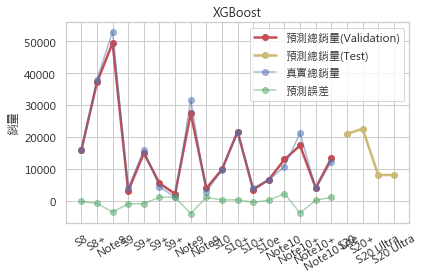

In [59]:
plt.plot(xfit_xgb, yfit_xgb, '-or', linewidth = 2.5, label='預測總銷量(Validation)')
plt.plot(xfit_xgb_test, ytest_xgb, '-oy', linewidth = 2.5, label='預測總銷量(Test)')
plt.plot(xfit_xgb, df_samsung_sum_train['qty'], '-ob', alpha=0.5, label='真實總銷量')
plt.plot(xfit_xgb, yfit_xgb - ytrue, '-og', alpha=0.5, label='預測誤差')

# predicting new products
plt.xticks(np.concatenate((xfit, xfit_xgb_test)), np.concatenate((df_samsung_sum_train.index, df_predict_models.model)), rotation=30) 
plt.ylabel('銷量'), plt.title('XGBoost'), plt.legend()
plt.tight_layout()

In [60]:
ytest_xgb

array([20983.342, 22581.254,  8049.022,  8049.022], dtype=float32)

#### Random Forest (Comparison)

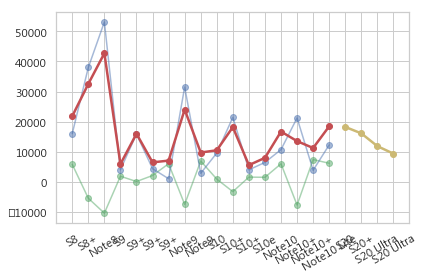

In [61]:
plt.plot(xfit, yfit - ytrue, '-og', alpha=0.5)
plt.plot(xfit, df_samsung_sum_train['qty'], '-ob', alpha=0.5)
plt.plot(xfit, yfit, '-or', linewidth = 2.5)

# predicting new products
plt.plot(xfit_test, ytest, '-oy', linewidth = 2.5)
plt.xticks(np.concatenate((xfit, xfit_test)), np.concatenate((df_samsung_sum_train.index, df_predict_models.model)), rotation=30) 
plt.tight_layout()

#### Poisson

In [62]:
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

In [63]:
def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)

In [64]:
df_samsung_combine.head()

,order_month,model,nphone,norder_mmb,nmmb_mmb,release_date
0,2019-08-01,Note10,5409,2360,2283,2019-08-01
1,2019-09-01,Note10,7491,2999,2906,2019-08-01
2,2019-10-01,Note10,6174,2188,2091,2019-08-01
3,2019-11-01,Note10,5076,1781,1677,2019-08-01
4,2019-12-01,Note10,3534,1552,1432,2019-08-01


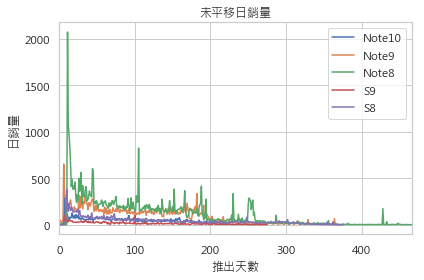

In [65]:
df_samsung_day[df_samsung_day.model=='Note10'].reset_index().nphone.plot(label = 'Note10')
df_samsung_day[df_samsung_day.model=='Note9'].reset_index().nphone.plot(label = 'Note9')
df_samsung_day[df_samsung_day.model=='Note8'].reset_index().nphone.plot(label = 'Note8')
df_samsung_day[df_samsung_day.model=='S9'].reset_index().nphone.plot(label = 'S9')
df_samsung_day[df_samsung_day.model=='S8'].reset_index().nphone.plot(label = 'S8')
plt.xlabel('推出天數'), plt.ylabel('日銷量'), plt.title('未平移日銷量'), plt.legend()
plt.tight_layout()

In [66]:
df_samsung_combine[df_samsung_combine.model=='Note9'].nphone.values

array([3111, 6412, 4778, 4234, 4330, 4343, 3820, 1285,  687,  496,  398,
        307,  137,    1,    1], dtype=int64)

In [67]:
x_note9 = df_samsung_combine[df_samsung_combine.model=='Note9'].nphone.index.values
y_note9 = df_samsung_combine[df_samsung_combine.model=='Note9'].nphone.values
y_note9 = y_note9/np.sum(y_note9)

In [68]:
posson_fit = curve_fit(fit_function, x_note9, y_note9)

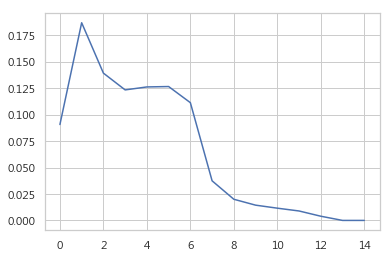

In [69]:
plt.plot(x_note9, y_note9)

#### Normalization

In [70]:
df_samsung_new = pd.DataFrame()#columns = df_samsung_day_combine.model.unique())
model_list = [t for t in df_samsung_day_combine.model.unique() if t != 'Note10 Lite']

for ii in model_list:
    tmp = df_samsung_day_combine[df_samsung_day_combine.model==ii]#.nphone
    tmp = tmp[tmp.nphone.argmax():].reset_index(drop=True).nphone
    df_samsung_new = df_samsung_new.merge(tmp, how = 'outer', left_index = True, right_index = True)

df_samsung_new.columns = model_list
df_samsung_new = df_samsung_new.reset_index().rename({'index':'day'}, axis = 1)

(Text(0.5, 0, '推出天數'), Text(0, 0.5, '日銷量'), Text(0.5, 1.0, '平移後日銷量'))

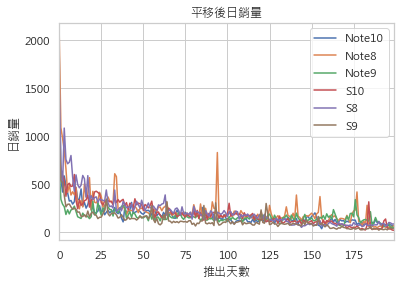

In [71]:
df_samsung_new.iloc[:200,1:].plot(linewidth = 1.5)
plt.xlabel('推出天數'), plt.ylabel('日銷量'), plt.title('平移後日銷量')

In [72]:
df_samsung_new.notnull().sum()

day       456
Note10    215
Note8     456
Note9     367
S10       385
S8        445
S9        324
dtype: int64

In [73]:
max_sample = df_samsung_new.iloc[:,1:].notnull().sum().min()
max_sample

215

In [74]:
df_samsung_new = df_samsung_new[:max_sample]
df_samsung_new.head(5)

,day,Note10,Note8,Note9,S10,S8,S9
0,0,1877.0,2075,653.0,1017.0,1563.0,1022.0
1,1,548.0,1085,338.0,567.0,692.0,534.0
2,2,414.0,976,287.0,593.0,496.0,514.0
3,3,582.0,844,262.0,540.0,1081.0,379.0
4,4,482.0,658,180.0,370.0,754.0,260.0


In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
# 調整Training的縮放
scaler = MinMaxScaler()
scaler.fit(df_samsung_new[['S8', 'S9', 'Note8', 'Note9']])
df_samsung_train = scaler.transform(df_samsung_new[['S8', 'S9', 'Note8', 'Note9']])
#df_samsung_train = (df_samsung_new[['S8', 'S9', 'Note8', 'Note9']]/df_samsung_new[['S8', 'S9', 'Note8', 'Note9']].sum()).values

In [77]:
from sklearn.neural_network import MLPRegressor

In [78]:
# Fit Model
x_s9 = np.arange(df_samsung_train.shape[0]).reshape(-1, 1)
y_s9 = df_samsung_train
reg = MLPRegressor(hidden_layer_sizes = (2), activation = 'logistic', solver = 'lbfgs', alpha = 0.5)
reg.fit(x_s9, y_s9)
y_s9_pred = reg.predict(x_s9)

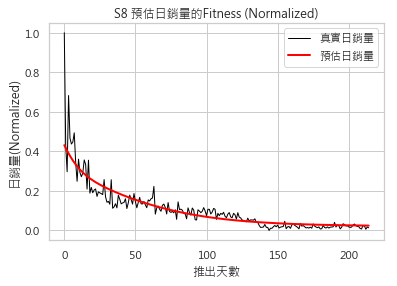

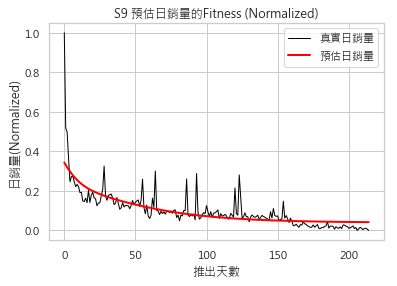

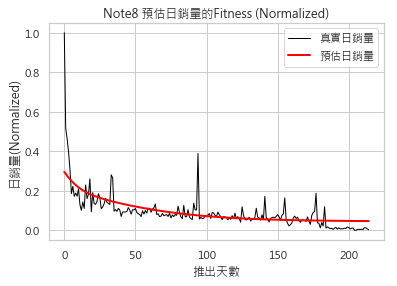

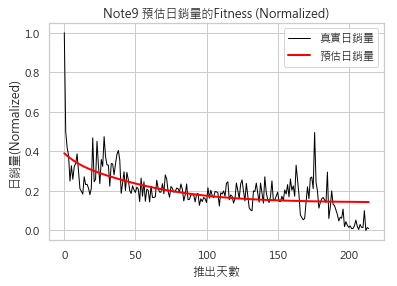

In [79]:
# 畫圖看fit
for i in np.arange(y_s9.shape[1]):
    plt.figure()
    plt.plot(y_s9[:,i], color = 'black', linewidth = 1, label='真實日銷量')
    plt.plot(y_s9_pred[:,i], color = 'red', linewidth = 2, label='預估日銷量')
    plt.title('{} 預估日銷量的Fitness (Normalized)'.format((['S8', 'S9', 'Note8', 'Note9'])[i]))
    plt.xlabel('推出天數'), plt.ylabel('日銷量(Normalized)'), plt.legend()

In [80]:
df_samsung_test = (df_samsung_new[['Note10', 'S10']]/df_samsung_new[['Note10', 'S10']].sum()).values
x_s10 = np.arange(df_samsung_test.shape[0]).reshape(-1, 1)
y_test_avg = np.average(y_s9_pred, axis = 1, weights=[0.2, 0.3, 0.3, 0.2])

In [81]:
# 縮放後predict出每個月的distribution
df_samsung_test1 = pd.DataFrame((np.array([y_test_avg, y_test_avg]).T), columns = ['Note10', 'S10'])
df_samsung_test1.head(2)

,Note10,S10
0,0.356148,0.356148
1,0.345326,0.345326


In [82]:
# 預測出的各型號銷量
pred_sale = pd.DataFrame(list(zip(*(np.concatenate((df_samsung_sum_train.index, df_predict_models.model)), np.concatenate((yfit,ytest))))), columns = ['model', 'predict_sale'])
pred_sale.head(2)

,model,predict_sale
0,S8,21821.638889
1,S8+,32549.086111


In [83]:
df_samsung_pred1 = df_samsung_test1/df_samsung_test1.sum()*[pred_sale.iloc[13:17].predict_sale.sum(), pred_sale.iloc[9:13].predict_sale.sum()]

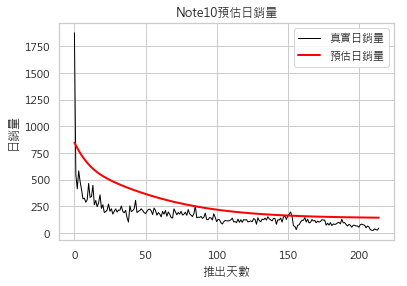

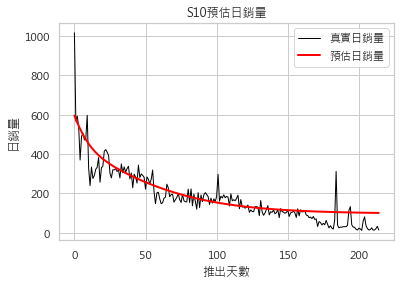

In [84]:
for col in ['Note10', 'S10']:
    plt.figure()
    plt.plot(df_samsung_new[col], color = 'black', linewidth = 1, label='真實日銷量')
    plt.plot(df_samsung_pred1[col], color = 'red', linewidth = 2, label='預估日銷量')
    plt.title('{}預估日銷量'.format(col))
    plt.xlabel('推出天數'), plt.ylabel('日銷量')
    plt.legend()

In [85]:
df_samsung_pred2 = y_test_avg/np.sum(y_test_avg)*pred_sale.iloc[17:].predict_sale.sum()

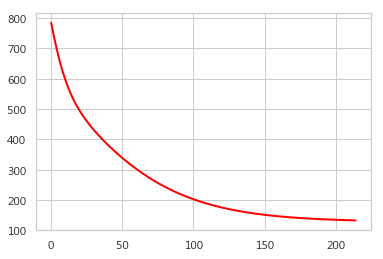

In [86]:
# S20每週的銷量預估
plt.plot(df_samsung_pred2, color = 'red', linewidth = 2)

#### 試驗證

In [97]:
df_true_sale = io.read_table('''
    select 
        date_trunc('day', order_date) order_date,
        count(distinct sl_key_new) norder,
        count(*) nphone,
        count(distinct sl_key_new) filter (where member_id is not null) norder_mmb,
        count(distinct member_id) filter (where member_id is not null) nmmb_mmb
    from pdata.txn_allchannel_detail 
    where order_date >= '2020-03-01'
        and cancel_flag = 'N'
        and off_p_level1 = '通訊商品類'
        and p_name ilike '%S20%'
    group by 1
''', verbose = False)

In [98]:
true_sale_max = df_true_sale.nphone.argmax()

In [99]:
df_true_sale_max = df_true_sale[df_true_sale.index>=true_sale_max].reset_index(drop=True)

In [100]:
df_true_sale_max.head()

,order_date,norder,nphone,norder_mmb,nmmb_mmb
0,2020-03-18,607,607,210,206
1,2020-03-19,338,338,123,121
2,2020-03-20,384,394,138,138
3,2020-03-21,287,287,102,98
4,2020-03-22,168,168,62,62


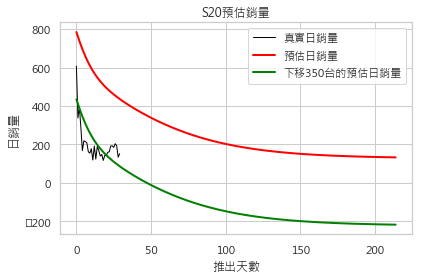

In [101]:
# S20每週的銷量預估 & ground truth
plt.plot(df_true_sale_max.nphone, color = 'black', linewidth = 1, label='真實日銷量')
plt.plot(df_samsung_pred2, color = 'red', linewidth = 2, label='預估日銷量')
plt.plot(df_samsung_pred2-350, color = 'green', linewidth = 2, label='下移350台的預估日銷量')
plt.xlabel('推出天數'), plt.ylabel('日銷量'), plt.legend(), plt.title('S20預估銷量')
plt.tight_layout()